
Crystal properties

                    CIF file:  /home/spc93/spc_cifs/mnsi_icsd_673224.cif
                     Lattice:  4.560 4.560 4.560 90.00 90.00 90.00
                   All sites:  Mn1, Si1
               Site selected:  Mn1
                 Site vector:  0.137 0.137 0.137
       No. of spacegroup ops:  12
      No. of sym ops at site:  3
 No. of equiv. sites in cell:  4
   No. of pg ops for crystal:  12

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 2.0, 2.0]
                Site allowed:  Yes
   Structure factor for site:  -0.01+-3.87i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor components

         Crystal (spherical):   [-0.+0.j  0.+0.j -0.+0.j -0.+0.j -0.+0.j] 
            Atom (spherical):   [ 0.5-0.5j  1.0+0.j   0.0+0.j   0.0-1.j  -0.5+0.5j] 

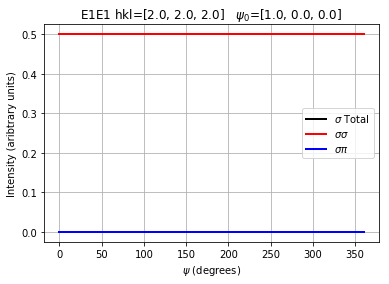

In [4]:
import TensorScatteringClass as ten
import numpy as np

#t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/nchem.2848-s6.cif', Site='Cu1');
t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/mnsi_icsd_673224.cif', Site='Mn1');

t.PlotIntensityInPolarizationChannels('E1E1', lam=1, hkl=np.array([2,2,2]), hkln=np.array([1,0,0]), K=2, Time=1, Parity=1, mk=None, lk=None, sk=None, sigmapi='sigma')
t.print_tensors()

In [7]:
import numpy as np
import iotbx.cif
def loadcif(ciffile,energy):
    wavelength=12.3984187/energy
    d_min_val = (wavelength/(2*np.sin(np.radians(180)/2)))
    cf = iotbx.cif.reader(file_path=ciffile).model()
    cif_block = cf.values()[0]
    c = iotbx.cif.reader(file_path = ciffile).build_crystal_structures().values()[0]
    s = c.scatterers()
    for _s in s:
        _s.scattering_type = _s.scattering_type.replace('0+', '')
    sg=c.crystal_symmetry().space_group()
    c=c.expand_to_p1(append_number_to_labels=False, sites_mod_positive=True)
    lattice=list(c.crystal_symmetry().unit_cell().parameters())
    sf = c.structure_factors(True,algorithm='direct',d_min=wavelength/2).f_calc()
    sfc = list(sf.data())
    reflist = list(sf.indices())
    SF=abs(np.array(sfc))**2
    return SF, np.array(reflist), lattice, c, np.array(sfc)

In [12]:
SF, reflist, lattice, c, sfc=loadcif('/home/spc93/spc_cifs/mnsi_icsd_673224.cif', 5.5)

In [27]:
np.concatenate((reflist, np.array([SF]).T), 1)



array([[ -3.00000000e+00,  -2.00000000e+00,   1.00000000e+00,
          3.15678282e+02],
       [  3.00000000e+00,   2.00000000e+00,  -1.00000000e+00,
          3.15678282e+02],
       [ -3.00000000e+00,  -1.00000000e+00,   1.00000000e+00,
          7.88174822e+02],
       ..., 
       [ -3.00000000e+00,  -2.00000000e+00,  -1.00000000e+00,
          3.15678282e+02],
       [  4.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.98272622e+03],
       [ -4.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.98272622e+03]])

In [21]:
reflist.shape
SF.shape

(256,)